In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
key_joint = pd.read_csv("blazepose_csv/person2.csv", index_col=0)
key_joint

,frame,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,right_ear_x,...,left_hip_score,right_hip_score,left_knee_score,right_knee_score,left_ankle_score,right_ankle_score,left_heel_score,right_heel_score,left_foot_index_score,right_foot_index_score
0,0,661.908321,668.474139,671.962487,676.312650,656.355015,651.231389,646.750987,676.552082,637.744938,...,0.999993,0.999995,0.997532,0.998650,0.998796,0.999155,0.981776,0.980807,0.998525,0.998671
1,1,672.904899,679.704318,683.256825,687.510301,667.936659,662.792061,659.385467,690.314849,652.350466,...,0.999992,0.999994,0.997523,0.998676,0.998744,0.999151,0.981125,0.980579,0.998435,0.998636
2,2,673.953510,680.627751,684.725621,689.267704,668.392156,663.378056,659.881866,691.526042,653.273423,...,0.999991,0.999993,0.997417,0.998699,0.998629,0.999147,0.979546,0.980257,0.998235,0.998580
3,3,674.489499,681.300205,685.305782,689.800267,668.765472,663.739483,660.257781,692.009956,653.566057,...,0.999989,0.999992,0.997201,0.998670,0.998508,0.999127,0.978034,0.979899,0.998041,0.998519
4,4,674.552327,681.412546,685.483335,689.857263,668.800550,663.834130,660.318061,692.140206,653.571309,...,0.999988,0.999991,0.996876,0.998564,0.998352,0.999070,0.976137,0.978862,0.997813,0.998403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,846,604.794953,613.474187,618.619391,622.754655,599.416188,594.573562,591.641000,627.229925,586.656347,...,0.999951,0.999957,0.907500,0.933814,0.945159,0.915640,0.726941,0.732350,0.950186,0.924395
847,847,614.954499,622.910102,627.424402,631.713007,608.149056,604.333897,600.146521,636.090905,594.304625,...,0.999958,0.999963,0.923501,0.945439,0.954833,0.931103,0.767213,0.770428,0.958822,0.937897
848,848,620.872817,627.725216,633.195845,636.708222,613.631237,608.820286,604.366945,640.269749,598.202270,...,0.999962,0.999967,0.935588,0.954146,0.961870,0.942607,0.794254,0.792200,0.965222,0.947704
849,849,623.951370,630.393187,635.250104,639.579476,616.438747,611.670433,607.569246,642.816452,600.744069,...,0.999965,0.999968,0.945259,0.961278,0.967538,0.951961,0.813956,0.811319,0.970313,0.955690


# Updating orientation

(0,0) is in the top left corner of the video frame. The video frame dimensions are 1280 (width) and 720 (height). The points are generated from AI embedded application, which mirrors the video. Blazepose assumes the video is inverted and swapped the left and right labels, so I will fix them in this next section.

The second edit to orientation is done to get (0,0) in the bottom left of the video frame. To switch the frame so that the video is mirrored and the corrdinates are in the bottom left, remove the comment from the second for loop.

In [3]:
new_names = np.array([])
for col in key_joint.columns:
    if "left" in col:
        new_col = col.replace("left", "right")
    elif "right" in col:
        new_col = col.replace("right", "left")
    else:
        new_col = col
    new_names = np.append(new_names, new_col)

In [4]:
switch_left_right = key_joint.set_axis(new_names, axis=1, inplace=False)
switch_left_right

,frame,nose_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_ear_x,left_ear_x,...,right_hip_score,left_hip_score,right_knee_score,left_knee_score,right_ankle_score,left_ankle_score,right_heel_score,left_heel_score,right_foot_index_score,left_foot_index_score
0,0,661.908321,668.474139,671.962487,676.312650,656.355015,651.231389,646.750987,676.552082,637.744938,...,0.999993,0.999995,0.997532,0.998650,0.998796,0.999155,0.981776,0.980807,0.998525,0.998671
1,1,672.904899,679.704318,683.256825,687.510301,667.936659,662.792061,659.385467,690.314849,652.350466,...,0.999992,0.999994,0.997523,0.998676,0.998744,0.999151,0.981125,0.980579,0.998435,0.998636
2,2,673.953510,680.627751,684.725621,689.267704,668.392156,663.378056,659.881866,691.526042,653.273423,...,0.999991,0.999993,0.997417,0.998699,0.998629,0.999147,0.979546,0.980257,0.998235,0.998580
3,3,674.489499,681.300205,685.305782,689.800267,668.765472,663.739483,660.257781,692.009956,653.566057,...,0.999989,0.999992,0.997201,0.998670,0.998508,0.999127,0.978034,0.979899,0.998041,0.998519
4,4,674.552327,681.412546,685.483335,689.857263,668.800550,663.834130,660.318061,692.140206,653.571309,...,0.999988,0.999991,0.996876,0.998564,0.998352,0.999070,0.976137,0.978862,0.997813,0.998403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,846,604.794953,613.474187,618.619391,622.754655,599.416188,594.573562,591.641000,627.229925,586.656347,...,0.999951,0.999957,0.907500,0.933814,0.945159,0.915640,0.726941,0.732350,0.950186,0.924395
847,847,614.954499,622.910102,627.424402,631.713007,608.149056,604.333897,600.146521,636.090905,594.304625,...,0.999958,0.999963,0.923501,0.945439,0.954833,0.931103,0.767213,0.770428,0.958822,0.937897
848,848,620.872817,627.725216,633.195845,636.708222,613.631237,608.820286,604.366945,640.269749,598.202270,...,0.999962,0.999967,0.935588,0.954146,0.961870,0.942607,0.794254,0.792200,0.965222,0.947704
849,849,623.951370,630.393187,635.250104,639.579476,616.438747,611.670433,607.569246,642.816452,600.744069,...,0.999965,0.999968,0.945259,0.961278,0.967538,0.951961,0.813956,0.811319,0.970313,0.955690


In [5]:
new_tbl = switch_left_right[['frame']].copy()
for col in switch_left_right.columns[1:]:
# uncomment this section to make the graph mirror the image
#     if '_x' in col:
#         new_tbl[col] = 1280 - switch_lr[col]
        
    if '_y' in col:
        new_tbl[col] = 720 - switch_left_right[col]
        
    else:
        new_tbl[col] = switch_left_right[col]
new_tbl

,frame,nose_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_ear_x,left_ear_x,...,right_hip_score,left_hip_score,right_knee_score,left_knee_score,right_ankle_score,left_ankle_score,right_heel_score,left_heel_score,right_foot_index_score,left_foot_index_score
0,0,661.908321,668.474139,671.962487,676.312650,656.355015,651.231389,646.750987,676.552082,637.744938,...,0.999993,0.999995,0.997532,0.998650,0.998796,0.999155,0.981776,0.980807,0.998525,0.998671
1,1,672.904899,679.704318,683.256825,687.510301,667.936659,662.792061,659.385467,690.314849,652.350466,...,0.999992,0.999994,0.997523,0.998676,0.998744,0.999151,0.981125,0.980579,0.998435,0.998636
2,2,673.953510,680.627751,684.725621,689.267704,668.392156,663.378056,659.881866,691.526042,653.273423,...,0.999991,0.999993,0.997417,0.998699,0.998629,0.999147,0.979546,0.980257,0.998235,0.998580
3,3,674.489499,681.300205,685.305782,689.800267,668.765472,663.739483,660.257781,692.009956,653.566057,...,0.999989,0.999992,0.997201,0.998670,0.998508,0.999127,0.978034,0.979899,0.998041,0.998519
4,4,674.552327,681.412546,685.483335,689.857263,668.800550,663.834130,660.318061,692.140206,653.571309,...,0.999988,0.999991,0.996876,0.998564,0.998352,0.999070,0.976137,0.978862,0.997813,0.998403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,846,604.794953,613.474187,618.619391,622.754655,599.416188,594.573562,591.641000,627.229925,586.656347,...,0.999951,0.999957,0.907500,0.933814,0.945159,0.915640,0.726941,0.732350,0.950186,0.924395
847,847,614.954499,622.910102,627.424402,631.713007,608.149056,604.333897,600.146521,636.090905,594.304625,...,0.999958,0.999963,0.923501,0.945439,0.954833,0.931103,0.767213,0.770428,0.958822,0.937897
848,848,620.872817,627.725216,633.195845,636.708222,613.631237,608.820286,604.366945,640.269749,598.202270,...,0.999962,0.999967,0.935588,0.954146,0.961870,0.942607,0.794254,0.792200,0.965222,0.947704
849,849,623.951370,630.393187,635.250104,639.579476,616.438747,611.670433,607.569246,642.816452,600.744069,...,0.999965,0.999968,0.945259,0.961278,0.967538,0.951961,0.813956,0.811319,0.970313,0.955690


In [6]:
key_joint = new_tbl

### EXAMPLE PLOT OF NEW ORIENTATION

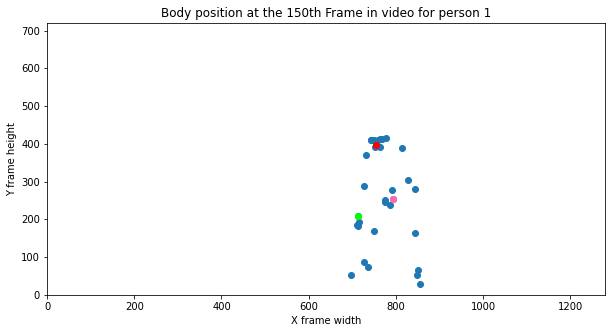

In [7]:
# Body points
i=150
fig, (ax1) = plt.subplots(1, figsize=[10,5])

# plot 1
ax1.scatter(new_tbl.iloc[i, 1:34], new_tbl.iloc[i, 34:67])
# Nose point
ax1.scatter(new_tbl.iloc[i, 1], new_tbl.iloc[i, 34], color='red');
# # Neck point
# ax1.scatter(new_tbl.iloc[i, 101], new_tbl.iloc[i, 102], color='peru');
# print(nose_neck_angles[i])

# left point
ax1.scatter(new_tbl.loc[i, 'left_wrist_x'], new_tbl.loc[i, 'left_wrist_y'], color='lime');

# right point
ax1.scatter(new_tbl.loc[i, 'right_wrist_x'], new_tbl.loc[i, 'right_wrist_y'], color='hotpink');
ax1.set_xlim(left=0, right=1280)
ax1.set_ylim(bottom=0, top=720);
ax1.set_xlabel("X frame width")
ax1.set_ylabel("Y frame height");
ax1.set_title("Body position at the 150th Frame in video for person 1");

# EDA Nose to Neck Angles

## Neck (X,Y) Estimate
Neck coordinates are not calculated by the blazepose pose detection model, so we are estimating neck from left and right shoulder informations.

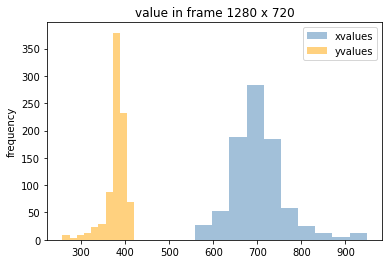

In [8]:
new_tbl['neck_estimate_x'] = np.average(new_tbl[['left_shoulder_x', 'right_shoulder_x']], axis=1)
new_tbl['neck_estimate_y'] = np.average(new_tbl[['left_shoulder_y', 'right_shoulder_y']], axis=1)

plt.hist(new_tbl['neck_estimate_x'], color='steelblue', label='xvalues', alpha=0.5)
plt.hist(new_tbl['neck_estimate_y'], color='orange', label='yvalues', alpha=0.5);
plt.title('value in frame 1280 x 720')
plt.ylabel('frequency')
plt.legend();

## Neck to Nose Angle
From the neck and nose x-y coordinates, we can calculate the angle between the two points to get a sense of how people are positioned within a specific frame.

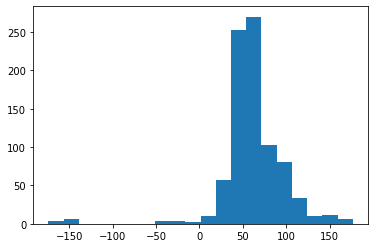

In [9]:
import math
x1 = new_tbl['neck_estimate_x']
x2 = new_tbl['nose_x']
y1 = new_tbl['neck_estimate_y']
y2 = new_tbl['nose_y']

nose_neck_angles = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
# print(nose_neck_angles[258])
new_tbl['nose_neck_angles'] = nose_neck_angles
plt.hist(nose_neck_angles, bins=20);

## Neck to Nose Angle over Time

How does this change over the minute reaction video? The points are plotted over all of the frames. There is a line at the 90 degree angle (alignment between neck and nose points in a vertical line).

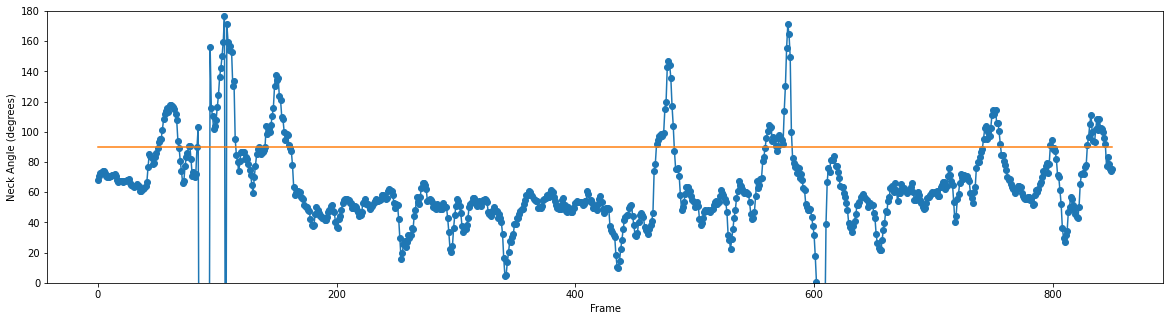

In [33]:
# graph over time
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(key_joint['frame'], new_tbl['nose_neck_angles'])
plt.plot(key_joint['frame'], new_tbl['nose_neck_angles'])

# 90 degree angle
plt.plot(new_tbl['frame'], np.ones(851)*90)
plt.ylim(bottom=0, top=180);
plt.xlabel("Frame")
plt.ylabel('Neck Angle (degrees)');
plt.savefig("plots/neck_angle_p2.png")

# Creating New Features

In [38]:
# key_joint.loc[:,'left_nose_to_hip'] = key_joint['left_hip_y'] - key_joint['nose_y']
# key_joint.loc[:,'right_nose_to_hip'] = key_joint['right_hip_y'] - key_joint['nose_y']
# key_joint.loc[:,'left_hip_to_knee'] = key_joint['left_knee_y'] - key_joint['left_hip_y'] 
# key_joint.loc[:,'right_hip_to_knee'] = key_joint['right_knee_y'] - key_joint['right_hip_y']
# key_joint.loc[:, 'avg_hip_to_knee'] = np.mean([key_joint['left_knee_y'],key_joint['right_knee_y']], axis=0) - np.mean([key_joint['left_hip_y'],key_joint['right_hip_y']], axis=0)
# key_joint.iloc[:, 100:]


key_joint.loc[:,'left_nose_to_hip'] = key_joint['nose_y'] - key_joint['left_hip_y']
key_joint.loc[:,'right_nose_to_hip'] =  key_joint['nose_y'] - key_joint['right_hip_y']

key_joint.loc[:,'left_hip_to_knee'] = key_joint['left_hip_y'] - key_joint['left_knee_y']
key_joint.loc[:,'right_hip_to_knee'] = key_joint['right_hip_y'] - key_joint['right_knee_y']

key_joint.loc[:, 'avg_hip_to_knee'] = np.mean([key_joint['left_hip_y'],key_joint['right_hip_y']], axis=0) - np.mean([key_joint['left_knee_y'],key_joint['right_knee_y']], axis=0) 

key_joint.loc[:, 'avg_nose_to_knee'] = key_joint['nose_y'] - np.mean([key_joint['left_knee_y'],key_joint['right_knee_y']], axis=0) 

# key_joint.iloc[:, 135:]

##### Additional Features (not yet considered)

- if arm is above hip
- if arm above shoulder
- if arm below knee
- if elbow close to hip

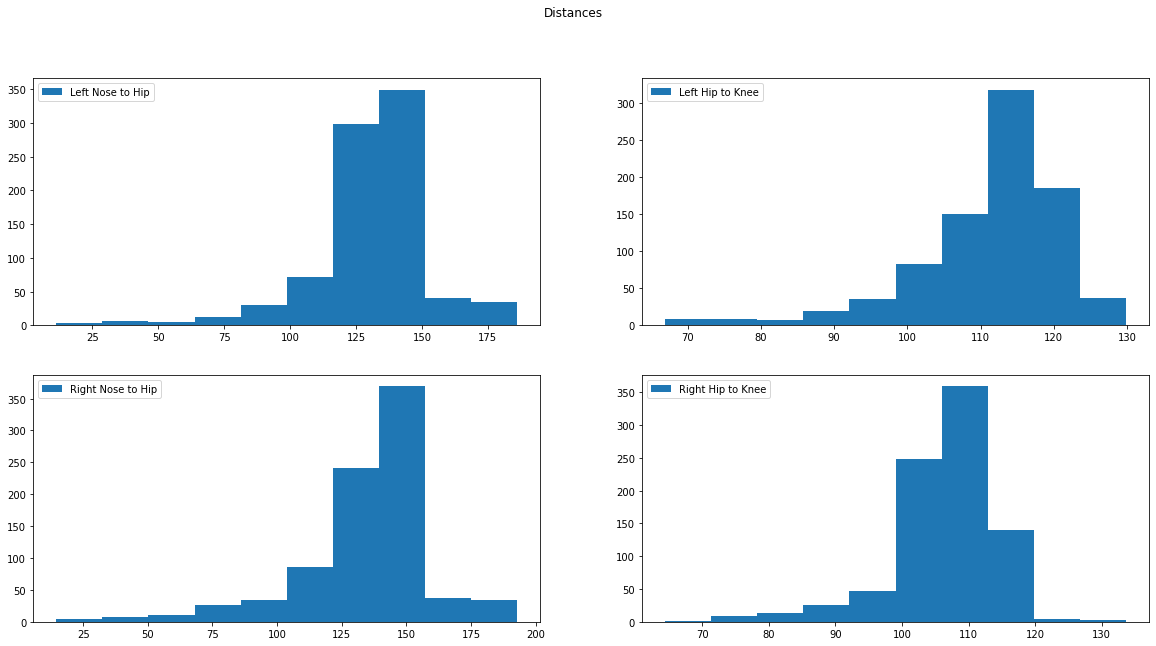

In [39]:
key_joint.sort_values('left_nose_to_hip')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=[20,10])
fig.suptitle("Distances")
ax1.hist(key_joint['left_nose_to_hip'], label='Left Nose to Hip');
ax1.legend(loc='upper left')

ax2.hist(key_joint['left_hip_to_knee'], label ='Left Hip to Knee');
ax2.legend(loc='upper left')

ax3.hist(key_joint['right_nose_to_hip'], label ='Right Nose to Hip');
ax3.legend(loc='upper left')

ax4.hist(key_joint['right_hip_to_knee'], label ='Right Hip to Knee');
ax4.legend(loc='upper left');

(40.0, 180.0)

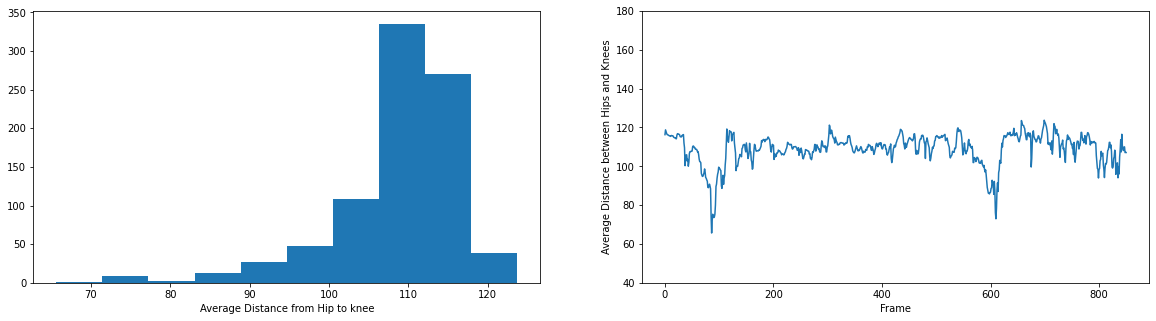

In [43]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,5])

# ax1.hist(key_joint['avg_hip_to_knee']);
# ax1.set_xlabel('Average Distance from Hip to knee')

# ax2.plot(key_joint['frame'], key_joint['avg_hip_to_knee']);
# ax2.set_xlabel('Frame')
# ax2.set_ylabel('Average Distance between Hips and Knees');

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20,5])

ax1.hist(key_joint['avg_hip_to_knee']);
ax1.set_xlabel('Average Distance from Hip to knee')

ax2.plot(key_joint['frame'], key_joint['avg_hip_to_knee']);
ax2.set_xlabel('Frame')
ax2.set_ylabel('Average Distance between Hips and Knees');
ax2.set_ylim(40, 180)

## need to scale this to proximity to camera

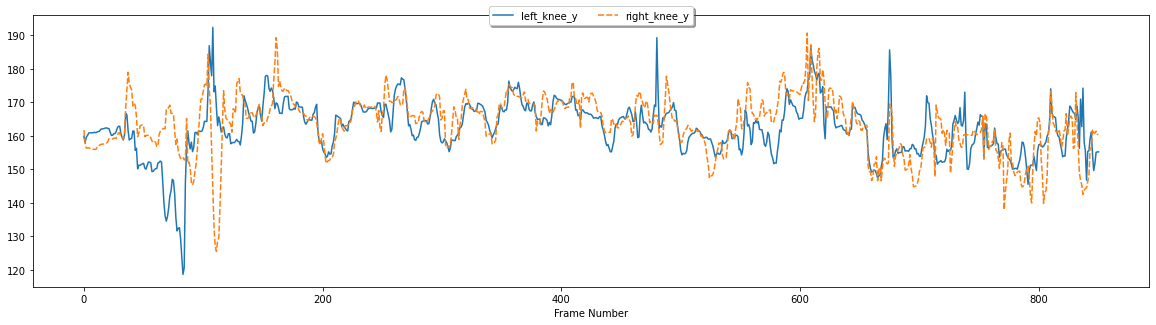

In [14]:
# position of knees heights over time
knees = key_joint[['left_knee_y','right_knee_y']]
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=knees, ax=ax); 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Frame Number');

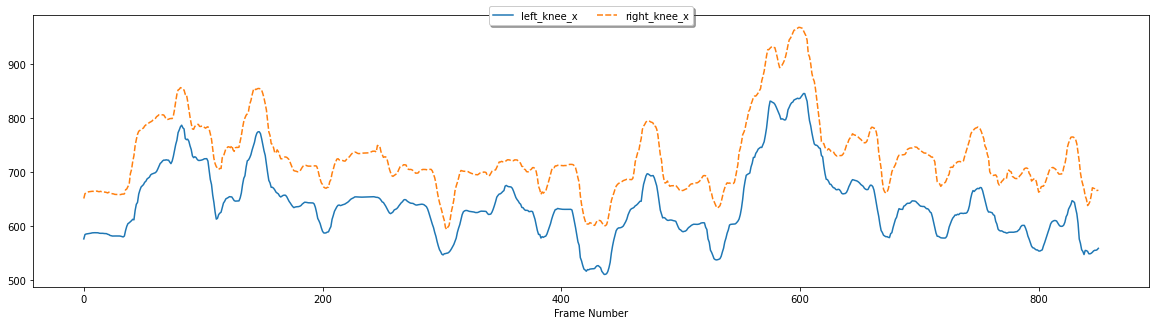

In [15]:
# position of knees on x axis over time
knees = key_joint[['left_knee_x','right_knee_x']]
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=knees, ax=ax); 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Frame Number');

## Wrist Features

In [16]:
mean_wrist_heights = np.mean(key_joint[['left_wrist_y','right_wrist_y']])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


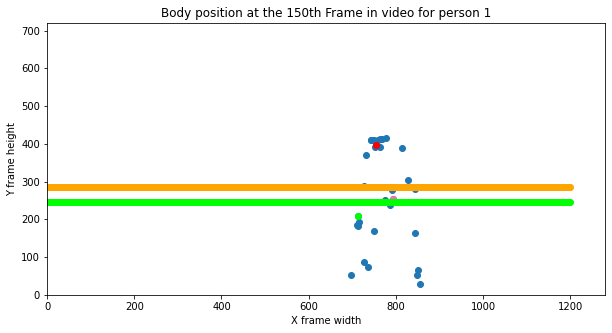

In [17]:
# Body points
i=150
fig, (ax1) = plt.subplots(1, figsize=[10,5])

# plot 1
ax1.scatter(new_tbl.iloc[i, 1:34], new_tbl.iloc[i, 34:67])
# Nose point
ax1.scatter(new_tbl.iloc[i, 1], new_tbl.iloc[i, 34], color='red');
# # Neck point
# ax1.scatter(new_tbl.iloc[i, 101], new_tbl.iloc[i, 102], color='peru');
# print(nose_neck_angles[i])

# left point
ax1.scatter(new_tbl.loc[i, 'left_wrist_x'], new_tbl.loc[i, 'left_wrist_y'], color='lime');

# right point
ax1.scatter(new_tbl.loc[i, 'right_wrist_x'], new_tbl.loc[i, 'right_wrist_y'], color='hotpink');
ax1.set_xlim(left=0, right=1280)
ax1.set_ylim(bottom=0, top=720);
ax1.set_xlabel("X frame width")
ax1.set_ylabel("Y frame height");
ax1.set_title("Body position at the 150th Frame in video for person 1");


np.mean(key_joint[['left_wrist_y','right_wrist_y']])
ax1.scatter(np.arange(0, 1200), np.ones(1200)*mean_wrist_heights[0], color='orange')
ax1.scatter(np.arange(0, 1200), np.ones(1200)*mean_wrist_heights[1], color='lime')

In [18]:
np.mean(key_joint[['left_wrist_y','right_wrist_y']])[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


285.663459675306

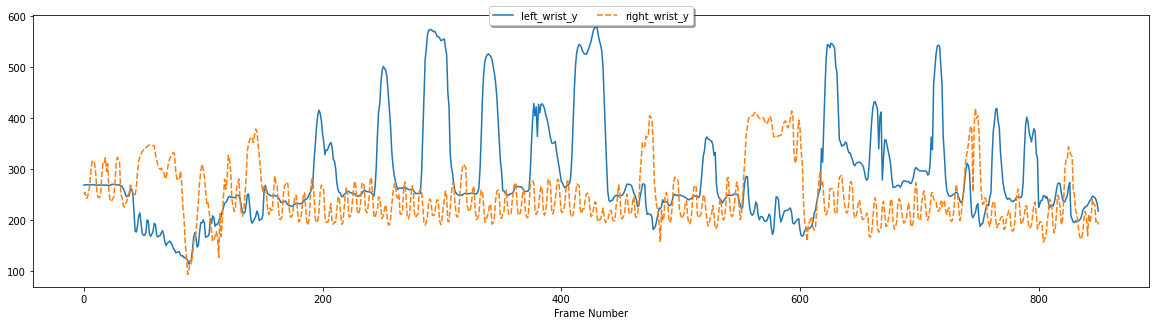

In [34]:
# heights of wrists over time
wrists = key_joint[['left_wrist_y','right_wrist_y']]
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=wrists, ax=ax); 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Frame Number');
plt.savefig("plots/wrist_height_p2.png")

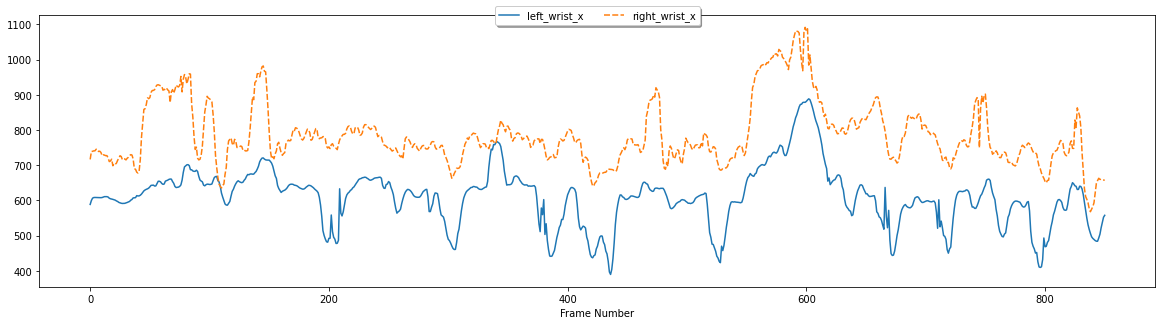

In [20]:
# heights of wrists over time
wrists = key_joint[['left_wrist_x','right_wrist_x']]
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=wrists, ax=ax); 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Frame Number');

# **plot  hand positioning across all frames and color by right and left hand**

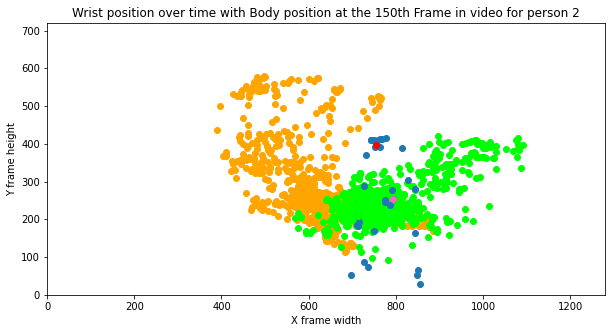

In [35]:
# Body points
i=150
fig, (ax1) = plt.subplots(1, figsize=[10,5])

ax1.scatter(key_joint['left_wrist_x'], key_joint['left_wrist_y'], color='orange')
ax1.scatter(key_joint['right_wrist_x'], key_joint['right_wrist_y'], color='lime')


# plot 1
ax1.scatter(new_tbl.iloc[i, 1:34], new_tbl.iloc[i, 34:67])
# Nose point
ax1.scatter(new_tbl.iloc[i, 1], new_tbl.iloc[i, 34], color='red');
# # Neck point
# ax1.scatter(new_tbl.iloc[i, 101], new_tbl.iloc[i, 102], color='peru');
# print(nose_neck_angles[i])

# left point
ax1.scatter(new_tbl.loc[i, 'left_wrist_x'], new_tbl.loc[i, 'left_wrist_y'], color='lime');

# right point
ax1.scatter(new_tbl.loc[i, 'right_wrist_x'], new_tbl.loc[i, 'right_wrist_y'], color='hotpink');
ax1.set_xlim(left=0, right=1280)
ax1.set_ylim(bottom=0, top=720);
ax1.set_xlabel("X frame width")
ax1.set_ylabel("Y frame height");
ax1.set_title("Wrist position over time with Body position at the 150th Frame in video for person 2");
plt.savefig("plots/wrist_position_over_time_p2.png")


# ax1.scatter(key_joint['left_wrist_x'], key_joint['left_wrist_y'], color='orange')
# ax1.scatter(key_joint['right_wrist_x'], key_joint['right_wrist_y'], color='lime')
# # ax1.scatter(np.arange(0, 1200), np.ones(1200)*mean_wrist_heights[0], color='orange')
# ax1.scatter(np.arange(0, 1200), np.ones(1200)*mean_wrist_heights[1], color='lime')

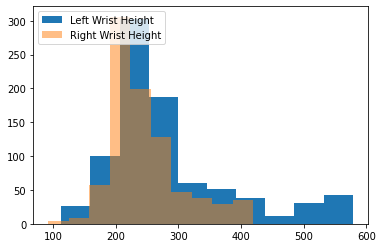

In [22]:
# Wrist Heights
# can this be used to estimate hand dominance? if one hand tends to be lower?
# does the video account for the mirroring?
plt.hist(key_joint['left_wrist_y'], label='Left Wrist Height');
plt.legend(loc='upper left');

plt.hist(key_joint['right_wrist_y'], label='Right Wrist Height', alpha=0.5);
plt.legend(loc='upper left');

# Pattern Analysis

### K Means Clustering on original data

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
data = key_joint.loc[:, ['nose_neck_angles']]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(data)
# pd.DataFrame(X_scaled).head(3)

X_scaled = data

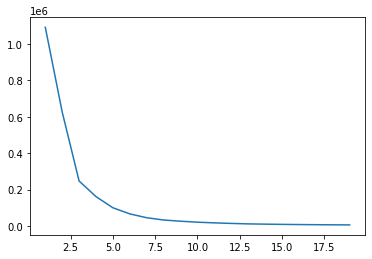

In [25]:
wcss = []

for i in range(1, 20):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X_scaled)
    wcss.append(clustering.inertia_)
    
ks = np.arange(1,20)
sns.lineplot(x = ks, y = wcss);

In [26]:
# The elbow plot seems to be ideal when the number of clusters equals 3.
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)

first_clusterings = pd.DataFrame(X_scaled)
first_clusterings['cluster'] = kmeans.labels_
print(X_scaled.shape)
first_clusterings

(851, 2)


,nose_neck_angles,cluster
0,68.330818,0
1,70.702088,0
2,72.680076,0
3,73.150249,0
4,74.191993,0
...,...,...
846,83.617869,0
847,78.481484,0
848,75.201678,0
849,73.719229,0


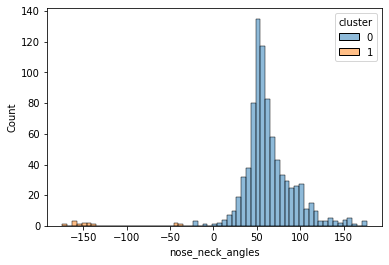

In [27]:
# pd.DataFrame(scaler.inverse_transform(first_clusterings))
sns.histplot(data=first_clusterings, x="nose_neck_angles", hue="cluster", alpha=0.5);

(array([ 13.,  49., 135., 276., 238.,  95.,  22.,   5.,   7.,  11.]),
 array([559.6503973 , 601.39033485, 643.1302724 , 684.87020996,
        726.61014751, 768.35008506, 810.09002261, 851.82996017,
        893.56989772, 935.30983527, 977.04977282]),
 <BarContainer object of 10 artists>)

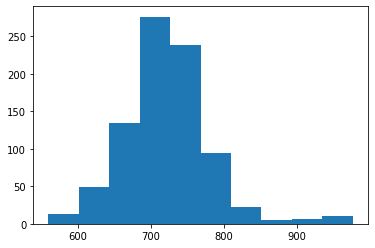

In [28]:
plt.hist(key_joint['right_eye_inner_x'])


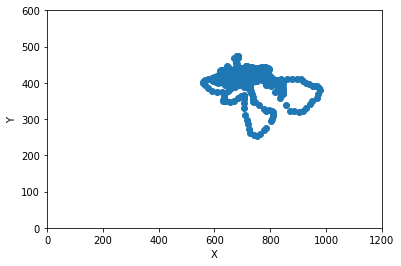

In [29]:

plt.scatter(key_joint['right_eye_inner_x'], key_joint['right_eye_inner_y'])
# plt.scatter(key_joint['left_eye_inner_x'], key_joint['left_eye_inner_y'])
# plt.scatter(key_joint['left_eye_outer_x'], key_joint['left_eye_outer_y'])
# plt.scatter(key_joint['right_eye_outer_x'], key_joint['right_eye_outer_y'])
plt.xlabel('X')
plt.ylabel("Y");
plt.xlim(0, 1200)
plt.ylim(0, 600);

### Average across frames per second

In [30]:
new_df = pd.DataFrame(columns=key_joint.columns)
old_start = 0
second = 0
for i in np.arange(14, len(key_joint), 14):

    new_df.loc[second] = (key_joint.iloc[old_start:i, :]).mean(axis=0)
    old_start = i
    second += 1
    
new_df.head(5)

,frame,nose_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_ear_x,left_ear_x,...,right_foot_index_score,left_foot_index_score,neck_estimate_x,neck_estimate_y,nose_neck_angles,left_nose_to_hip,right_nose_to_hip,left_hip_to_knee,right_hip_to_knee,avg_hip_to_knee
0,6.5,675.518569,681.688676,685.640034,689.919319,669.636764,664.658801,660.802865,691.615927,653.227028,...,0.997283,0.997993,660.805878,416.851802,71.529751,-182.802469,-188.835740,-117.487979,-115.171608,-116.329794
1,20.5,675.041291,679.853186,684.630756,687.839015,668.268899,664.306265,659.421147,689.017129,651.325428,...,0.996153,0.996692,657.740328,418.090458,68.066025,-182.361087,-188.762217,-117.210627,-113.902806,-115.556716
2,34.5,670.645005,676.375460,680.492199,683.911202,664.364780,660.044478,655.404358,684.422577,646.709730,...,0.996180,0.995867,653.443082,403.822824,63.551435,-162.054339,-165.297629,-115.004911,-106.406482,-110.705697
3,48.5,706.381205,711.326620,715.376970,718.945056,698.951697,694.130585,689.908851,721.612712,681.829633,...,0.990862,0.967600,705.471657,360.034228,88.510829,-125.021877,-115.194297,-107.332803,-107.082731,-107.207767
4,62.5,726.153361,730.908737,735.099397,738.738781,718.793320,714.531327,710.628289,742.811726,703.372331,...,0.990955,0.930136,733.608532,340.208614,108.784999,-108.029253,-97.105894,-104.635569,-102.907543,-103.771556


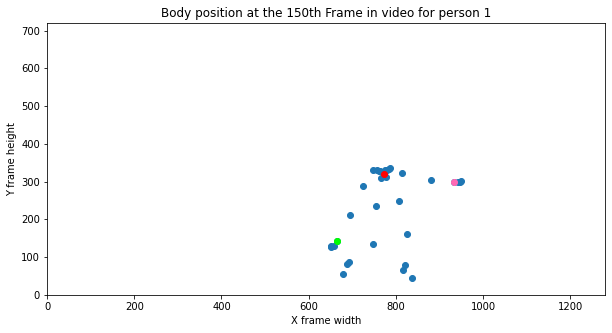

In [31]:
# Body points

i=5
fig, (ax1) = plt.subplots(1, figsize=[10,5])

# plot 1
ax1.scatter(new_df.iloc[i, 1:34], new_df.iloc[i, 34:67])
# Nose point
ax1.scatter(new_df.iloc[i, 1], new_df.iloc[i, 34], color='red');
# # Neck point
# ax1.scatter(new_tbl.iloc[i, 101], new_tbl.iloc[i, 102], color='peru');
# print(nose_neck_angles[i])

# left point
ax1.scatter(new_df.loc[i, 'left_wrist_x'], new_df.loc[i, 'left_wrist_y'], color='lime');

# right point
ax1.scatter(new_df.loc[i, 'right_wrist_x'], new_df.loc[i, 'right_wrist_y'], color='hotpink');
ax1.set_xlim(left=0, right=1280)
ax1.set_ylim(bottom=0, top=720);
ax1.set_xlabel("X frame width")
ax1.set_ylabel("Y frame height");
ax1.set_title("Body position at the 150th Frame in video for person 1");

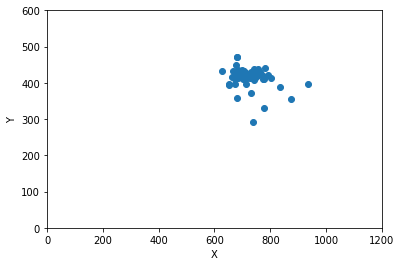

In [32]:
plt.scatter(new_df['right_eye_inner_x'], new_df['right_eye_inner_y'])
# plt.scatter(key_joint['left_eye_inner_x'], key_joint['left_eye_inner_y'])
# plt.scatter(key_joint['left_eye_outer_x'], key_joint['left_eye_outer_y'])
# plt.scatter(key_joint['right_eye_outer_x'], key_joint['right_eye_outer_y'])
plt.xlabel('X')
plt.ylabel("Y");
plt.xlim(0, 1200)
plt.ylim(0, 600);